In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)


/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [4]:
# your code here
tri_state_df = df[(df['_STATE'] == 9) | (df['_STATE'] == 34)| (df['_STATE'] == 36)]

Now check to see how large our subset df.

In [5]:
# your code here
tri_state_df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [6]:
df['PHYSHLTH'].unique()

array([88.,  2., 28.,  5., 30.,  4.,  3., 77., 15., 29.,  7., 10., 14.,
        6.,  1.,  8., 25., 99., 20., 12., 18., 27., 21., 19., 22.,  9.,
       13., 17., 11., 16., 24., 26., 23.])

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [7]:
#your code here
# dropping rows for people with codes 99 & 77 since we dont have their data
df2 = df[~(df['PHYSHLTH'] == 99) & ~(df['PHYSHLTH'] == 77)]
# changing all codes of 88 to 0 since they were sick for 0 days
df2['PHYSHLTH'].replace(to_replace=88,value=0,inplace=True)
# df2['PHYSHLTH'].unique()
df2.reset_index()

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,index,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
1,49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
2,49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
3,49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
4,49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33742,303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
33743,303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
33744,303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
33745,303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [8]:
df2.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

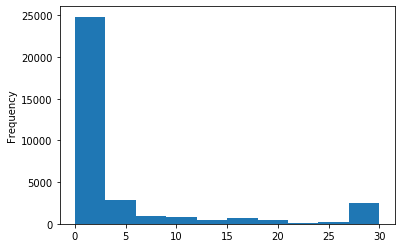

In [9]:
df2['PHYSHLTH'].plot.hist()

In [10]:
# <matplotlib.axes._subplots.AxesSubplot at 0x1193c39b0>

In [11]:
# graphic showing those descriptive stats

In [12]:
# graphic showing the distribution of data

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [13]:
# code to calculate the average number of sick days by state

df2.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

Text(0.5, 1.0, 'Average Sick Days By State')

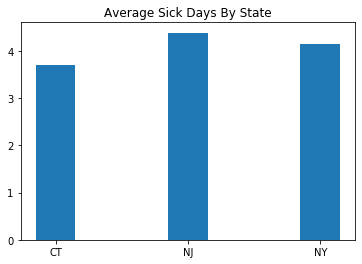

In [14]:
# code to graph those averages using matplotlib
x = ['CT','NJ','NY']
y = df2.groupby('_STATE')['PHYSHLTH'].mean()
plt.bar(x,y,width=.3)
plt.title('Average Sick Days By State')

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [15]:
# # columns with chronic illness
# columns_with_chronic_illness = ['CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2']
# def clean(raw_data):
#     for i in raw_data:
#         n = i.split(',')
#     return n
# columns_with_chronic_illness = clean(columns_with_chronic_illness)
# columns_with_chronic_illness



In [16]:
# code to create new colum for chronically sick,
# if they were sick for 30 days we assume a chronic ilness and assign a value of 1 otherwise they get 0
df2['HAS_CHRONIC'] = np.where(df2['PHYSHLTH'] == 30,1,0)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [17]:
# code to calculate averages per state
df2.groupby('_STATE')['HAS_CHRONIC'].sum()

_STATE
9.0     662
34.0    942
36.0    834
Name: HAS_CHRONIC, dtype: int64

Text(0.5, 1.0, 'Chronic Sickness By State')

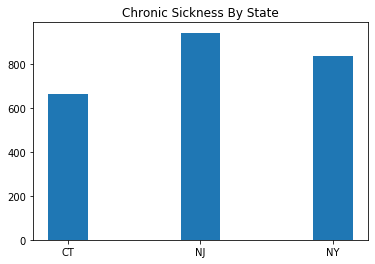

In [18]:
# create graphic to compare chronically sick by state
x = ['CT','NJ','NY']
y = df2.groupby('_STATE')['HAS_CHRONIC'].sum()
plt.bar(x,y,width=.3)
plt.title('Chronic Sickness By State')

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [19]:
# 1. drop all rows of data which have smokers who either dont know or refused to say 
df3 = df2[~(df2['SMOKDAY2'] == 9) & ~(df2['SMOKDAY2'] == 7)]
# drop the lack of data
df3.dropna(subset=['SMOKDAY2'],inplace=True)
# replacing the assigned codes for levels of smokers into 3 buckets, daily,occasional, and never smokers 
# and changing df2
df3.replace({'SMOKDAY2':{1: 'daily smokers', 2: 'occasional smoker',3: 'non smokers'}},inplace=True)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [20]:
# 2.
df3[df3.SMOKDAY2.isnull() == True]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,HAS_CHRONIC


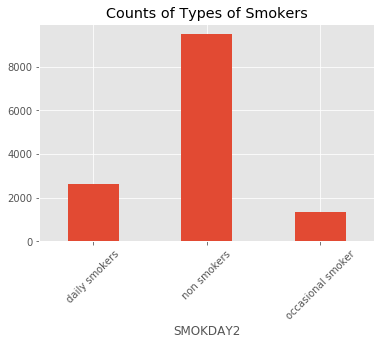

In [21]:
# 3.'histogram' for the buckets of smokers
plt.style.use('ggplot')

df3.groupby(['SMOKDAY2']).SMOKDAY2.count().plot.bar(width=.45)
plt.xticks(rotation=45)
plt.title('Counts of Types of Smokers')
plt.show()

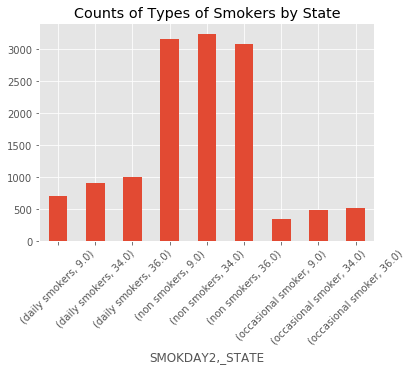

In [22]:
plt.style.use('ggplot')


df3.groupby(['SMOKDAY2','_STATE']).SMOKDAY2.count().plot.bar()
# plt.bar(x,y)
plt.xticks(rotation=45)
plt.title('Counts of Types of Smokers by State')

plt.show()


In [23]:
smoke_state_group = df3.reset_index().groupby(['SMOKDAY2','_STATE']).count()
smoke_state_group = smoke_state_group.reset_index()[['SMOKDAY2','_STATE','index']]
smoke_state_group = smoke_state_group.replace({'_STATE':{9:'CT',34:'NJ',36:'NY'}})
smoke_state_group

,SMOKDAY2,_STATE,index
0,daily smokers,CT,706
1,daily smokers,NJ,901
2,daily smokers,NY,1004
3,non smokers,CT,3166
4,non smokers,NJ,3249
5,non smokers,NY,3079
6,occasional smoker,CT,344
7,occasional smoker,NJ,480
8,occasional smoker,NY,512


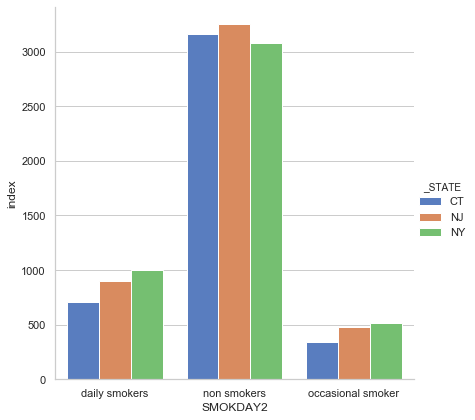

In [24]:
sns.set(style="whitegrid")

x1 = df3['SMOKDAY2']
# y1 = df3['index']
y1 = df3['_STATE']
# sns.catplot(x=x1,y=y1)

sns.catplot(x="SMOKDAY2", y="index", hue='_STATE',  data=smoke_state_group,
                height=6, kind="bar", palette="muted")

In [25]:
smoker_sickdays = df3.loc[:,['SMOKDAY2','PHYSHLTH']]
smoker_sickdays2 = smoker_sickdays.groupby('SMOKDAY2').PHYSHLTH.describe().reset_index()
smoker_sickdays2


,SMOKDAY2,count,mean,std,min,25%,50%,75%,max
0,daily smokers,2611.0,6.653007,10.757402,0.0,0.0,0.0,10.0,30.0
1,non smokers,9494.0,4.581841,8.976577,0.0,0.0,0.0,4.0,30.0
2,occasional smoker,1336.0,6.295659,10.359176,0.0,0.0,0.0,7.0,30.0


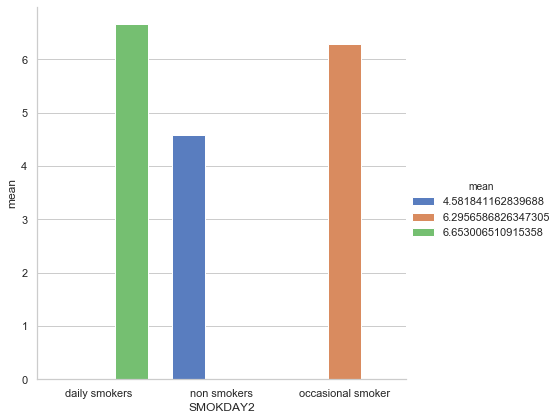

In [26]:
# smoker_sickdays
# x1=smoker_sickdays.PHYSHLTH['mean']
# y1=smoker_sickdays.PHYSHLTH['count']
# h1=smoker_sickdays.SMOKDAY2 
sns.catplot(x='SMOKDAY2', y='mean',height=6,hue='mean',data=smoker_sickdays2, kind="bar", palette="muted")


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [27]:

df3.dropna(subset=['ALCDAY5'],inplace=True)


/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
alcohol_to_drop = df3[(df3['ALCDAY5'] == 999) | (df3['ALCDAY5'] == 777)].index
df3.drop(index=alcohol_to_drop,inplace=True)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df3.ALCDAY5 = df3.ALCDAY5.map(lambda x: '0' if x== 888 else str(x)[1:])


/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
df3.ALCDAY5 = df3.ALCDAY5.map(lambda x: int(float(x)))

In [31]:
df3.ALCDAY5.describe()

count    13108.000000
mean         4.707278
std          7.976207
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max         30.000000
Name: ALCDAY5, dtype: float64

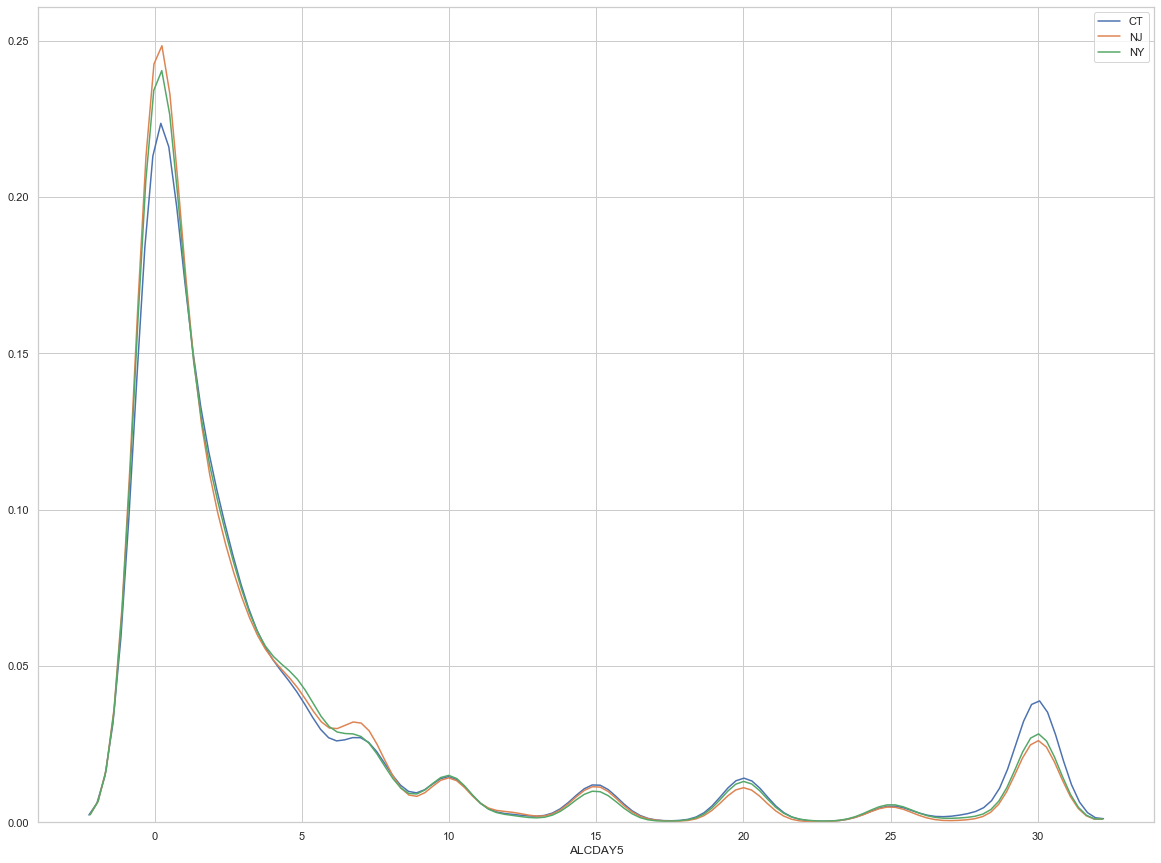

In [69]:
ct = df3[df3['_STATE']==9]['ALCDAY5']
nj = df3[df3['_STATE']==34]['ALCDAY5']
ny = df3[df3['_STATE']==36]['ALCDAY5']
plt.figure(figsize=(20,15))
sns.distplot(ct,label='CT',bins=30,hist=False)
sns.distplot(nj,label='NJ',bins=30,hist=False)
sns.distplot(ny,label='NY',bins=30,hist=False)

,_STATE,ALCDAY5
0,CT,5.332603
1,NJ,4.292898
2,NY,4.552944


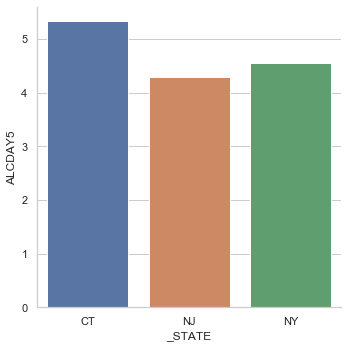

In [33]:
alc_by_state = df3.groupby(['_STATE'])['ALCDAY5'].mean().reset_index()
alc_by_state = alc_by_state.replace({'_STATE':{9:'CT',34:'NJ',36:'NY'}})

sns.catplot(x='_STATE',y='ALCDAY5',data=alc_by_state,kind='bar')
alc_by_state.head(20)

(array([4.882e+03, 1.779e+03, 1.434e+03, 8.760e+02, 6.240e+02, 6.400e+02,
        2.150e+02, 5.280e+02, 1.610e+02, 9.000e+00, 3.410e+02, 3.000e+00,
        5.700e+01, 4.000e+00, 2.300e+01, 2.600e+02, 9.000e+00, 3.000e+00,
        6.000e+00, 1.000e+00, 3.020e+02, 9.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 1.220e+02, 9.000e+00, 1.000e+01, 3.000e+01, 7.590e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

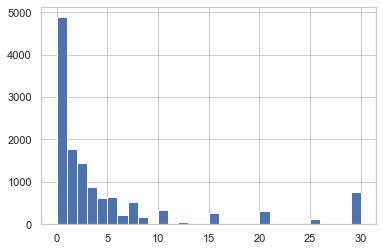

In [61]:
count_of_alc_by_state = df3[['_STATE','ALCDAY5']].reset_index(drop=True)
count_of_alc_by_state = count_of_alc_by_state.replace({'_STATE':{9:'CT',34:'NJ',36:'NY'}})
plt.hist(count_of_alc_by_state.ALCDAY5,bins=30)

In [85]:
days_sick_vs_drinking = df3[['PHYSHLTH','ALCDAY5']].reset_index(drop=True)

In [90]:
x1=days_sick_vs_drinking['PHYSHLTH']
y1=days_sick_vs_drinking['ALCDAY5']

np.corrcoef(days_sick_vs_drinking,rowvar=True)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1.,  1., -1., ...,  1.,  1., -1.],
       [ 1.,  1., -1., ...,  1.,  1., -1.],
       [-1., -1.,  1., ..., -1., -1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1., -1.],
       [ 1.,  1., -1., ...,  1.,  1., -1.],
       [-1., -1.,  1., ..., -1., -1.,  1.]])

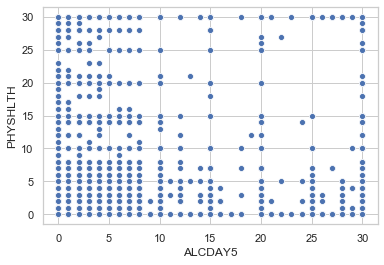

In [86]:
sns.scatterplot(x='ALCDAY5',y='PHYSHLTH',data=days_sick_vs_drinking)

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  